In [20]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from transformers import pipeline
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

# Load the data

In [21]:
# Reading the dataset
data = pd.read_csv("Data/Dropbox.csv")
data.head()

,reviewId,content,score
0,5f2d8570-d6a1-4d24-bf24-1104badceb39,There is no possibility to go further the prem...,5
1,0aad1b00-f472-43e8-9335-ab50334259f1,"They email me and told me they canceled it, an...",1
2,3b4ec632-5c8c-4de9-b23c-592596b9c5d6,Im going to start now,5
3,9c6bd009-26cb-4c1a-bd77-8a855743a76a,Easy to use.,5
4,1bfbbc18-12e6-43a7-acd8-862772298b3e,Very good 💯,4


# Review Analysis

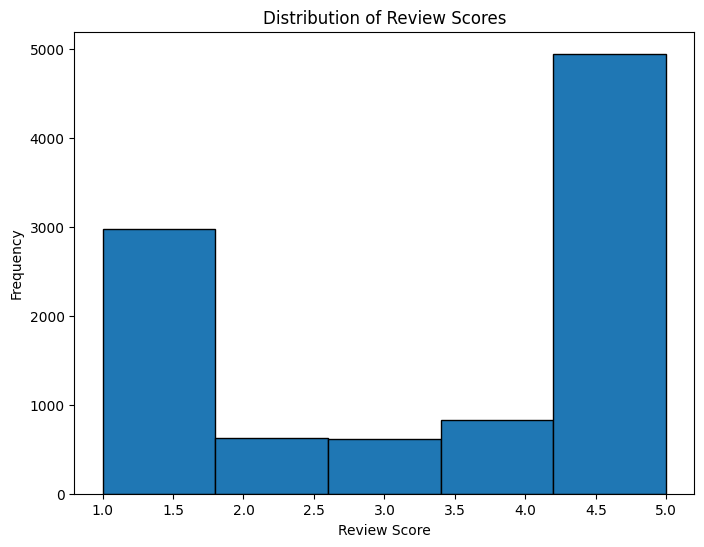

In [22]:
# Distribution of Review Scores (Dropbox)
plt.figure(figsize=(8, 6))
plt.hist(data['score'], bins=5, edgecolor='black')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Review Scores')

In [23]:
# Sampling 200 reviews from the dataset for analysis
new_data = data.sample(200)
new_data.head()

,reviewId,content,score
2782,b7dad67b-9e7e-461a-b290-bab11ef7bb4c,"OK, at first it was confusing as I was using t...",5
5645,27e66299-02ce-4353-b0ca-9823ea81bc9e,very nice,5
4708,cae324d6-3607-4707-854b-67b2751b705b,@countfd @maranathacdinc @durantecount +++...,4
2404,2bad1913-510b-4a7b-bc2c-b48123f0b95d,yeah it's all that,4
4132,fc4858ee-542b-4e7c-a26e-10514b3b6d52,I'm really struggling to find my files in this...,1


# TF (DistilBERT) for Sentiment Analysis

In [24]:
# Use the TensorFlow version of the DistilBERT model for sentiment analysis
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [25]:
# Create a sentiment analysis pipeline using the model and tokenizer
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [26]:
# Convert review content to a list of strings
texts = list(data.content.values.astype(str))

# Perform sentiment analysis on the reviews
results = nlp(texts)

In [29]:
# Print each review with its sentiment analysis result and original score
for text, result, score in zip(texts, results, data.score.values):
    print("Text", text)
    print("Result: ", result)
    print("Score: ", score)
    print("=".center(50,"="))

Text There is no possibility to go further the premium ads. Display is flickering Update: issue was solved quickly. The app is fine
Result:  {'label': 'POSITIVE', 'score': 0.9959393739700317}
Score:  5
Text They email me and told me they canceled it, and then charged me money anyways.
Result:  {'label': 'NEGATIVE', 'score': 0.9975773692131042}
Score:  1
Text Im going to start now
Result:  {'label': 'POSITIVE', 'score': 0.9981920123100281}
Score:  5
Text Easy to use.
Result:  {'label': 'POSITIVE', 'score': 0.9991925358772278}
Score:  5
Text Very good 💯
Result:  {'label': 'POSITIVE', 'score': 0.999870777130127}
Score:  4
Text excellent
Result:  {'label': 'POSITIVE', 'score': 0.9998434782028198}
Score:  5
Text Your system is so secure a can't even sign in. It wants to sends second verification to my email which I never receive. You can close my account because it's more trouble than is worth. I do not recommend this app even though I have used it in the past with no problems. This app sho

In [30]:
# Add a new column to the dataset with the sentiment analysis results
data['sentiment'] = [result['label'] for result in results]
data

,reviewId,content,score,sentiment
0,5f2d8570-d6a1-4d24-bf24-1104badceb39,There is no possibility to go further the prem...,5,POSITIVE
1,0aad1b00-f472-43e8-9335-ab50334259f1,"They email me and told me they canceled it, an...",1,NEGATIVE
2,3b4ec632-5c8c-4de9-b23c-592596b9c5d6,Im going to start now,5,POSITIVE
3,9c6bd009-26cb-4c1a-bd77-8a855743a76a,Easy to use.,5,POSITIVE
4,1bfbbc18-12e6-43a7-acd8-862772298b3e,Very good 💯,4,POSITIVE
...,...,...,...,...
9995,104a9535-ad76-4ec9-8c64-88a171c26e89,Good,4,POSITIVE
9996,9181c658-7d54-4b17-8ecc-4be0fe808544,Bad,1,NEGATIVE
9997,1e354e05-6435-49af-b119-c308955aa699,🙃🙂,5,NEGATIVE
9998,5835139b-832c-4519-81e6-044c14601727,I do not like these sub folders at all. I didn...,1,NEGATIVE


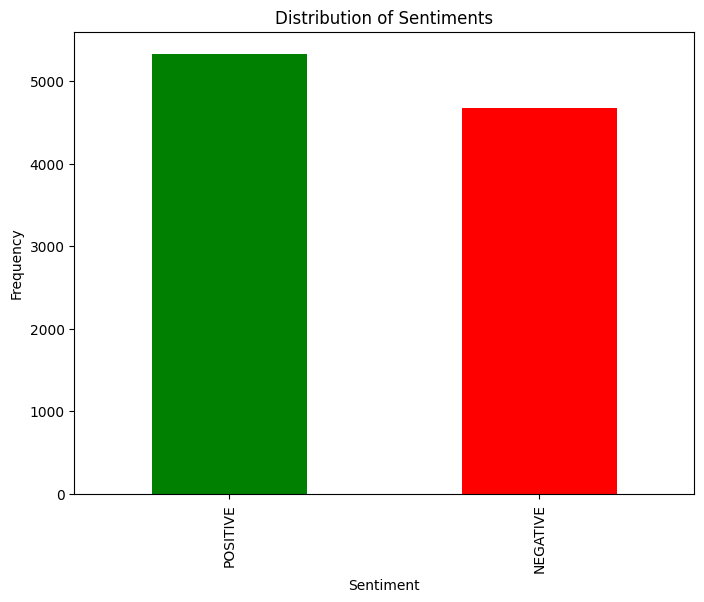

In [32]:
# Plotting the distribution of sentiments
plt.figure(figsize=(8, 6))
data['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiments')
plt.show()

# Model Evaluation

In [33]:
# Example of evaluating the model
from sklearn.metrics import confusion_matrix, classification_report

# Assuming scores above 3 are positive and 3 or below are negative
data['score_sentiment'] = data['score'].apply(lambda x: 'POSITIVE' if x > 3 else 'NEGATIVE')

# Confusion matrix and classification report
print(confusion_matrix(data['score_sentiment'], data['sentiment']))
print(classification_report(data['score_sentiment'], data['sentiment']))

[[3702  516]
 [ 967 4815]]
              precision    recall  f1-score   support

    NEGATIVE       0.79      0.88      0.83      4218
    POSITIVE       0.90      0.83      0.87      5782

    accuracy                           0.85     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.86      0.85      0.85     10000



### Key Points to Highlight from the Model Evaluation Output

#### Confusion Matrix:
- **True Negatives (TN)**: 3702 reviews correctly identified as negative.
- **False Positives (FP)**: 516 reviews incorrectly identified as positive.
- **False Negatives (FN)**: 967 reviews incorrectly identified as negative.
- **True Positives (TP)**: 4815 reviews correctly identified as positive.

#### Classification Report:
- **NEGATIVE Sentiment**:
  - **Precision**: 0.79 - The proportion of reviews predicted as negative that are actually negative.
  - **Recall**: 0.88 - The proportion of actual negative reviews correctly identified by the model.
  - **F1-Score**: 0.83 - The harmonic mean of precision and recall, providing a balance between the two metrics.
  - **Support**: 4218 - The number of actual occurrences of negative reviews in the dataset.
  
- **POSITIVE Sentiment**:
  - **Precision**: 0.90 - The proportion of reviews predicted as positive that are actually positive.
  - **Recall**: 0.83 - The proportion of actual positive reviews correctly identified by the model.
  - **F1-Score**: 0.87 - The harmonic mean of precision and recall for positive reviews.
  - **Support**: 5782 - The number of actual occurrences of positive reviews in the dataset.

- **Overall Metrics**:
  - **Accuracy**: 0.85 - The proportion of total reviews correctly classified by the model.
  - **Macro Avg**:
    - **Precision**: 0.85 - The average precision over both classes.
    - **Recall**: 0.86 - The average recall over both classes.
    - **F1-Score**: 0.85 - The average F1-score over both classes.
  - **Weighted Avg**:
    - **Precision**: 0.86 - The precision weighted by the number of true instances for each class.
    - **Recall**: 0.85 - The recall weighted by the number of true instances for each class.
    - **F1-Score**: 0.85 - The F1-score weighted by the number of true instances for each class.

### Important Insights:
1. **High Accuracy**: An overall accuracy of 85% indicates that the model performs well in predicting the sentiment of reviews.

2. **Precision and Recall Balance**: 
   - The model has a higher precision for positive reviews (0.90) compared to negative reviews (0.79), suggesting that when the model predicts a review as positive, it is very likely to be correct.
   - The recall for negative reviews (0.88) is higher than for positive reviews (0.83), indicating that the model is better at identifying negative reviews correctly.

3. **F1-Score**: 
   - The F1-score is higher for positive reviews (0.87) than for negative reviews (0.83), indicating better overall performance in predicting positive sentiment.
   - The balanced F1-scores suggest the model is performing consistently across both classes.

4. **Confusion Matrix Analysis**:
   - There are fewer false positives (516) compared to false negatives (967), meaning the model is more likely to miss positive reviews than to incorrectly classify negative reviews as positive.

# Save the Model

In [36]:
# Saving the dataset with sentiment results
data.to_csv("Data/Dropbox_with_sentiments.csv", index=False)